In [1]:
# ============================================================
# Filter climate dataframe by exact City names
# Keep only Date, City, and T (renamed from T2M)
# ============================================================

import pandas as pd
from google.colab import drive

# --- Mount Drive ---
drive.mount('/content/drive', force_remount=True)

# --- Load your climate dataset ---
file_path = "/content/drive/MyDrive/TDS/Climate/climate_data.csv"
df = pd.read_csv(file_path)

# --- Exact names to keep ---
cities_to_keep = [
"Barrow, Alaska (Utqiaġvik)",
"Greenland Ice Sheet",
"Amazon Rainforest (Manaus)",
"Sahara Desert (Tamanrasset, Algeria)",
"Sahel (Niamey, Niger)",
"Sydney, Australia",
"Mumbai, India",
"Bangkok, Thailand",
"Svalbard, Norway",
"McMurdo Station, Antarctica",
"Cape Town, South Africa",
"Mexico City, Mexico",
"Reykjavík, Iceland"

]

# --- Filter the dataframe by exact City names ---
df_selected = df[df["City"].isin(cities_to_keep)].copy()

# --- Keep only Date, City, and T2M ---
df_selected = df_selected[["Date", "City", "T2M"]]

# --- Rename T2M -> T ---
df_selected = df_selected.rename(columns={"T2M": "T"})

# --- Convert Date (already in yyyy-mm-dd format) ---
df_selected["Date"] = pd.to_datetime(df_selected["Date"], format="%Y-%m-%d", errors="coerce")

# --- Save to Drive ---
out_path = "/content/drive/MyDrive/TDS/Climate/result.csv"
df_selected.to_csv(out_path, index=False)

print(f"✅ Saved filtered dataframe to {out_path}")
print("Preview:")
print(df_selected.head())



Mounted at /content/drive
✅ Saved filtered dataframe to /content/drive/MyDrive/TDS/Climate/result.csv
Preview:
        Date                        City      T
0 1981-01-01  Barrow, Alaska (Utqiaġvik) -20.16
1 1981-01-02  Barrow, Alaska (Utqiaġvik) -17.14
2 1981-01-03  Barrow, Alaska (Utqiaġvik) -17.79
3 1981-01-04  Barrow, Alaska (Utqiaġvik) -18.45
4 1981-01-05  Barrow, Alaska (Utqiaġvik) -18.90


Mounted at /content/drive


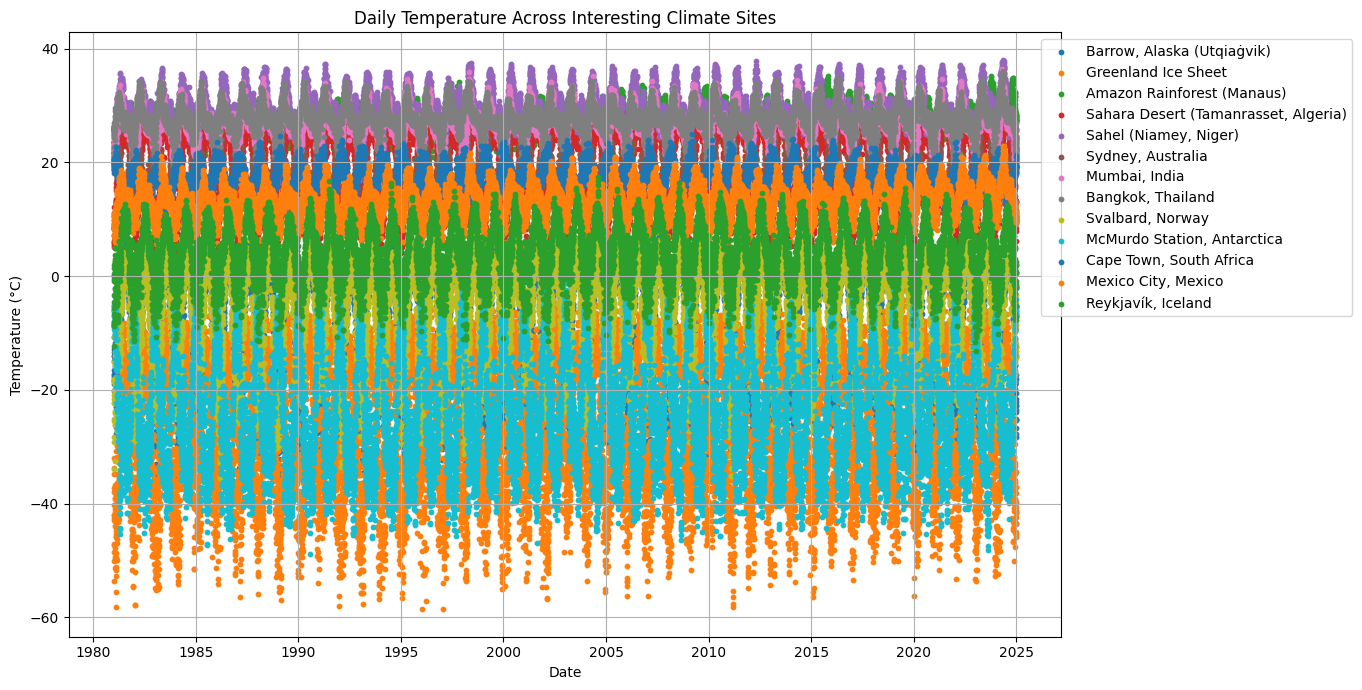

In [2]:
# ============================================================
# Scatterplot of Temperature for selected cities
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# --- Mount Drive ---
drive.mount('/content/drive', force_remount=True)

# --- Load the filtered dataset we saved earlier ---
file_path = "/content/drive/MyDrive/TDS/Climate/result.csv"
df_selected = pd.read_csv(file_path, parse_dates=["Date"])

# --- Plot scatter (all cities) ---
plt.figure(figsize=(14, 7))

for city in df_selected["City"].unique():
    subset = df_selected[df_selected["City"] == city]
    plt.scatter(
        subset["Date"],
        subset["T"],
        s=10,                # marker size
        alpha=1,           # transparency
        label=city
    )

plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Daily Temperature Across Interesting Climate Sites")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.0))  # place legend outside
plt.grid(True)
plt.tight_layout()
plt.show()


Mounted at /content/drive


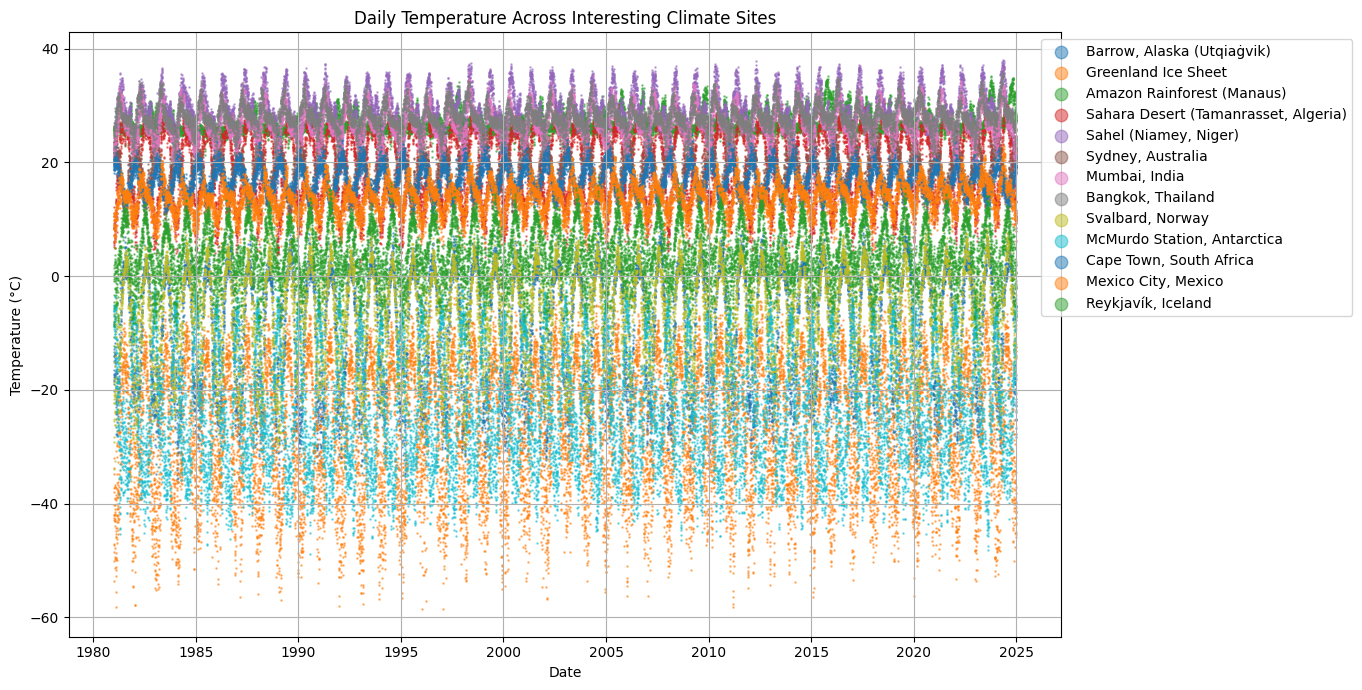

In [3]:
# ============================================================
# Scatterplot of Temperature for selected cities
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# --- Mount Drive ---
drive.mount('/content/drive', force_remount=True)

# --- Load the filtered dataset we saved earlier ---
file_path = "/content/drive/MyDrive/TDS/Climate/result.csv"
df_selected = pd.read_csv(file_path, parse_dates=["Date"])

# --- Plot scatter (all cities) ---
plt.figure(figsize=(14, 7))

for city in df_selected["City"].unique():
    subset = df_selected[df_selected["City"] == city]
    plt.scatter(
        subset["Date"],
        subset["T"],
        s=.75,                # small marker size for graph
        alpha=.5,
        label=city
    )

plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Daily Temperature Across Interesting Climate Sites")

# --- Customize legend markers ---
legend = plt.legend(
    loc="upper right",
    bbox_to_anchor=(1.3, 1.0),
    scatterpoints=1
)

for handle in legend.legend_handles:   # <-- lowercase, works in current mpl
    handle.set_sizes([80])   # larger marker in legend only

plt.grid(True)
plt.tight_layout()
plt.show()



Mounted at /content/drive
Using file: /content/drive/MyDrive/TDS/Climate/result.csv
✅ Loaded 16071 rows for Sahel (Niamey, Niger)
✅ No values outside [-100, 100] found in T.


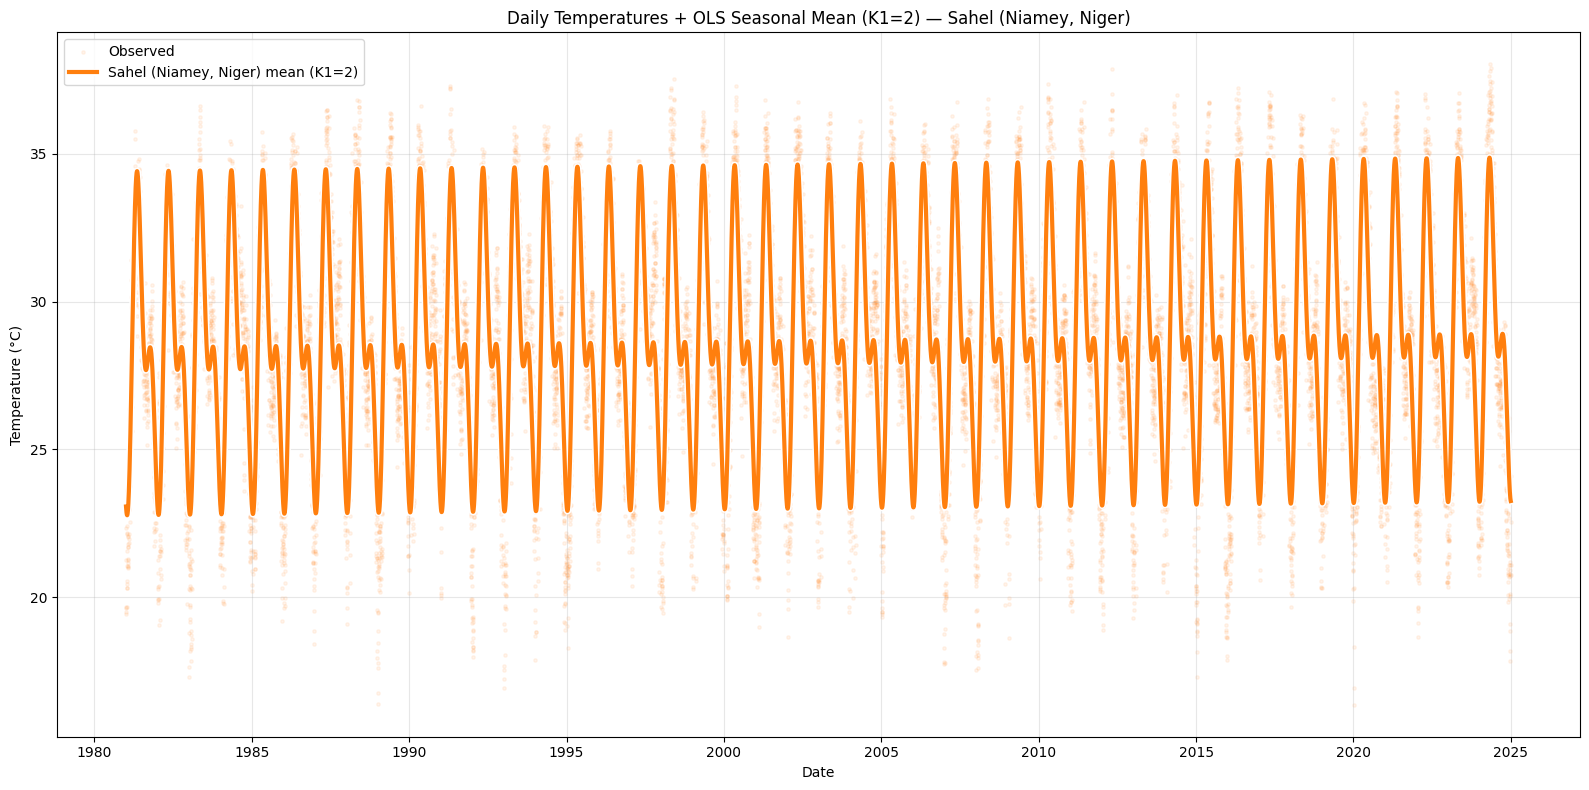

✅ Saved figure to /content/drive/MyDrive/TDS/Climate/figures/niger_mean_K1_2.png
✅ Saved parameters to /content/drive/MyDrive/TDS/Climate/params/niger_mean_K1_2_params.csv


,const,t,sin1,cos1,sin2,cos2,City,n_obs,R2,RMSE
0,28.392489,0.000029,1.648166,-3.650717,-2.121697,-1.669769,"Sahel (Niamey, Niger)",16071,0.780326,1.814411


In [ ]:
# ============================================================
# OLS seasonal mean (K1=2) for Niger only
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import patheffects as pe
from IPython.display import display
from google.colab import drive
from pathlib import Path

# ---------- Config ----------
CSV_PATH = "/content/drive/MyDrive/TDS/Climate/result.csv"

# Output directories
OUT_DIR     = Path("/content/drive/MyDrive/TDS/Climate")
FIG_DIR     = OUT_DIR / "figures"
PARAMS_DIR  = OUT_DIR / "params"

FIG_DIR.mkdir(parents=True, exist_ok=True)
PARAMS_DIR.mkdir(parents=True, exist_ok=True)

FIG_PATH   = FIG_DIR / "niger_mean_K1_2.png"
PARAMS_CSV = PARAMS_DIR / "niger_mean_K1_2_params.csv"

# ---------- Mount & load ----------
drive.mount('/content/drive', force_remount=True)
print(f"Using file: {CSV_PATH}")

df = pd.read_csv(CSV_PATH, parse_dates=["Date"])
df = df[["Date", "City", "T"]].dropna().copy()

# Filter Niger only
city_name = "Sahel (Niamey, Niger)"
d = df.loc[df["City"] == city_name, ["Date", "T"]].dropna().copy()

if d.empty:
    raise ValueError(f"No data found for {city_name}")

print(f"✅ Loaded {len(d)} rows for {city_name}")

# ---------- Check for extreme values ----------
extreme_mask = (d["T"] < -100) | (d["T"] > 100)
extreme_vals = d.loc[extreme_mask]

if extreme_vals.empty:
    print("✅ No values outside [-100, 100] found in T.")
else:
    print("⚠️ Found values outside [-100, 100]:")
    display(extreme_vals)
    d = d.loc[~extreme_mask].copy()
    print(f"✅ Removed extremes. Cleaned dataset shape: {d.shape}")

# ---------- Build design matrix ----------
d = d.sort_values("Date").reset_index(drop=True)
d["t"] = (d["Date"] - d["Date"].min()).dt.days.astype(float)
t = d["t"].to_numpy()
y = d["T"].astype(float).to_numpy()

X = pd.DataFrame({
    "const": np.ones_like(t),
    "t": t,
    "sin1": np.sin(2 * np.pi * t / 365.0),
    "cos1": np.cos(2 * np.pi * t / 365.0),
    "sin2": np.sin(4 * np.pi * t / 365.0),
    "cos2": np.cos(4 * np.pi * t / 365.0),
})

# ---------- Fit OLS ----------
model = sm.OLS(y, X).fit()
d["s(t)"] = model.predict(X)

# ---------- Plot ----------
fig, ax = plt.subplots(figsize=(16, 8))

# Scatter (faint)
ax.scatter(d["Date"], d["T"], s=6, alpha=0.08, color="tab:orange", label="Observed")

# Fitted mean line
(line,) = ax.plot(
    d["Date"], d["s(t)"],
    linewidth=3.0, color="tab:orange", label=f"{city_name} mean (K1=2)"
)
line.set_path_effects([pe.Stroke(linewidth=5.2, foreground="white"), pe.Normal()])

ax.set_title(f"Daily Temperatures + OLS Seasonal Mean (K1=2) — {city_name}")
ax.set_xlabel("Date")
ax.set_ylabel("Temperature (°C)")
ax.grid(True, alpha=0.3)
ax.legend()

fig.tight_layout()
plt.savefig(FIG_PATH, dpi=220, bbox_inches="tight")
plt.show()
print(f"✅ Saved figure to {FIG_PATH}")

# ---------- Save parameters ----------
params = model.params.to_dict()
params.update({
    "City": city_name,
    "n_obs": int(len(d)),
    "R2": float(model.rsquared),
    "RMSE": float(np.sqrt(np.mean((y - d['s(t)'].to_numpy())**2))),
})

params_df = pd.DataFrame([params])
params_df.to_csv(PARAMS_CSV, index=False)
print(f"✅ Saved parameters to {PARAMS_CSV}")
display(params_df)


Mounted at /content/drive
Using file: /content/drive/MyDrive/TDS/Climate/result.csv
✅ Loaded 16071 rows for Barrow, Alaska (Utqiaġvik)
✅ No values outside [-100, 100] found in T.


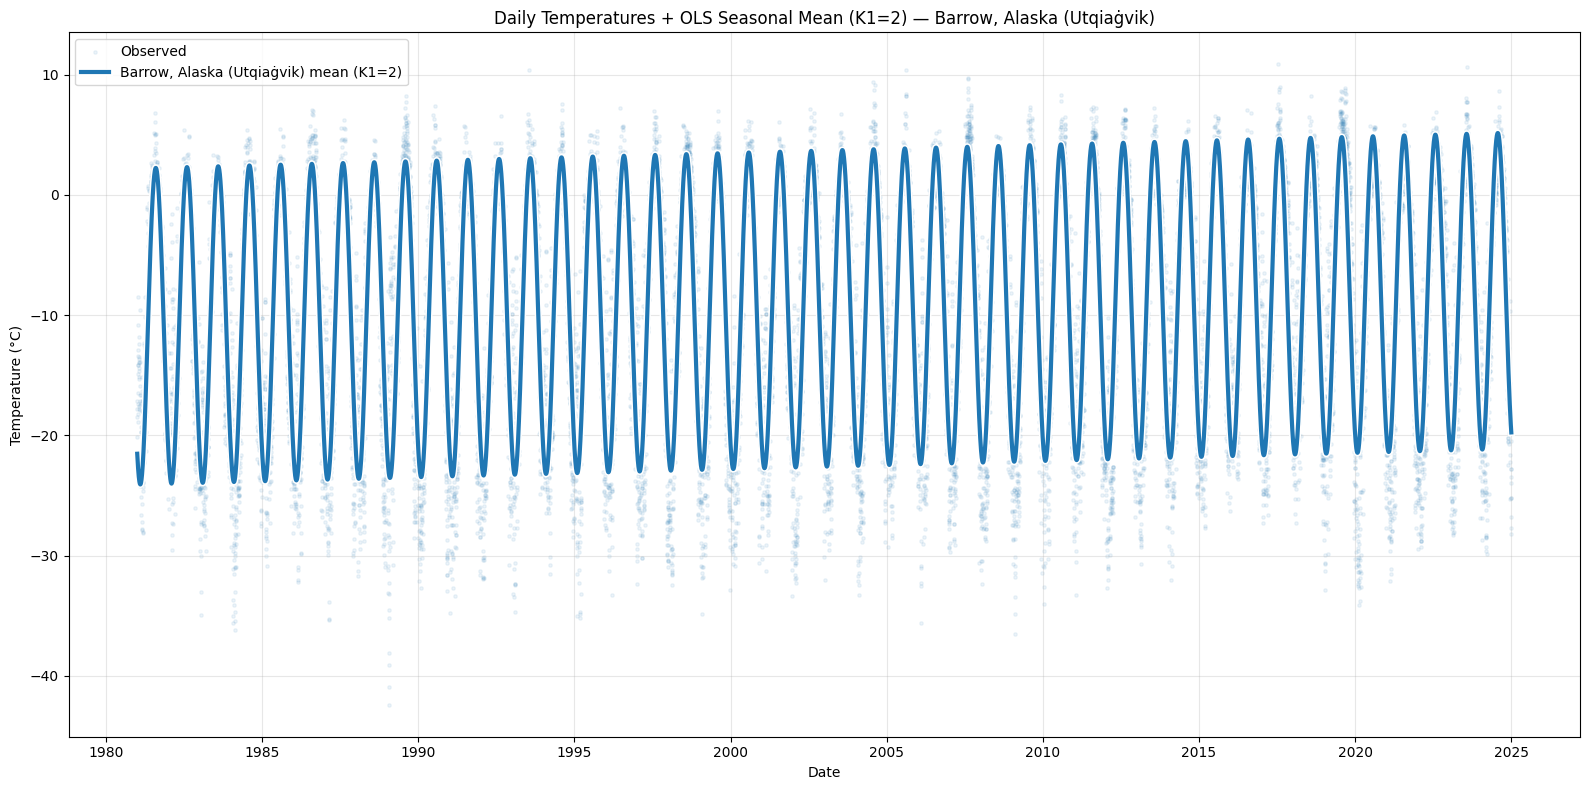

✅ Saved figure to /content/drive/MyDrive/TDS/Climate/figures/alaska_mean_K1_2.png
✅ Saved parameters to /content/drive/MyDrive/TDS/Climate/params/alaska_mean_K1_2_params.csv


,const,t,sin1,cos1,sin2,cos2,City,n_obs,R2,RMSE
0,-10.75534,0.000185,-7.518369,-10.780407,-0.19782,0.014982,"Barrow, Alaska (Utqiaġvik)",16071,0.806506,4.576522


In [ ]:
# ============================================================
# OLS seasonal mean (K1=2) for Alaska only
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import patheffects as pe
from IPython.display import display
from google.colab import drive
from pathlib import Path

# ---------- Config ----------
CSV_PATH = "/content/drive/MyDrive/TDS/Climate/result.csv"

# Output directories
OUT_DIR     = Path("/content/drive/MyDrive/TDS/Climate")
FIG_DIR     = OUT_DIR / "figures"
PARAMS_DIR  = OUT_DIR / "params"

FIG_DIR.mkdir(parents=True, exist_ok=True)
PARAMS_DIR.mkdir(parents=True, exist_ok=True)

FIG_PATH   = FIG_DIR / "alaska_mean_K1_2.png"
PARAMS_CSV = PARAMS_DIR / "alaska_mean_K1_2_params.csv"

# ---------- Mount & load ----------
drive.mount('/content/drive', force_remount=True)
print(f"Using file: {CSV_PATH}")

df = pd.read_csv(CSV_PATH, parse_dates=["Date"])
df = df[["Date", "City", "T"]].dropna().copy()

# Filter Alaska only
city_name = "Barrow, Alaska (Utqiaġvik)"
d = df.loc[df["City"] == city_name, ["Date", "T"]].dropna().copy()

if d.empty:
    raise ValueError(f"No data found for {city_name}")

print(f"✅ Loaded {len(d)} rows for {city_name}")

# ---------- Check for extreme values ----------
extreme_mask = (d["T"] < -100) | (d["T"] > 100)
extreme_vals = d.loc[extreme_mask]

if extreme_vals.empty:
    print("✅ No values outside [-100, 100] found in T.")
else:
    print("⚠️ Found values outside [-100, 100]:")
    display(extreme_vals)
    d = d.loc[~extreme_mask].copy()
    print(f"✅ Removed extremes. Cleaned dataset shape: {d.shape}")

# ---------- Build design matrix ----------
d = d.sort_values("Date").reset_index(drop=True)
d["t"] = (d["Date"] - d["Date"].min()).dt.days.astype(float)
t = d["t"].to_numpy()
y = d["T"].astype(float).to_numpy()

X = pd.DataFrame({
    "const": np.ones_like(t),
    "t": t,
    "sin1": np.sin(2 * np.pi * t / 365.0),
    "cos1": np.cos(2 * np.pi * t / 365.0),
    "sin2": np.sin(4 * np.pi * t / 365.0),
    "cos2": np.cos(4 * np.pi * t / 365.0),
})

# ---------- Fit OLS ----------
model = sm.OLS(y, X).fit()
d["s(t)"] = model.predict(X)

# ---------- Plot ----------
fig, ax = plt.subplots(figsize=(16, 8))

# Scatter (faint)
ax.scatter(d["Date"], d["T"], s=6, alpha=0.08, color="tab:blue", label="Observed")

# Fitted mean line
(line,) = ax.plot(
    d["Date"], d["s(t)"],
    linewidth=3.0, color="tab:blue", label=f"{city_name} mean (K1=2)"
)
line.set_path_effects([pe.Stroke(linewidth=5.2, foreground="white"), pe.Normal()])

ax.set_title(f"Daily Temperatures + OLS Seasonal Mean (K1=2) — {city_name}")
ax.set_xlabel("Date")
ax.set_ylabel("Temperature (°C)")
ax.grid(True, alpha=0.3)
ax.legend()

fig.tight_layout()
plt.savefig(FIG_PATH, dpi=220, bbox_inches="tight")
plt.show()
print(f"✅ Saved figure to {FIG_PATH}")

# ---------- Save parameters ----------
params = model.params.to_dict()
params.update({
    "City": city_name,
    "n_obs": int(len(d)),
    "R2": float(model.rsquared),
    "RMSE": float(np.sqrt(np.mean((y - d['s(t)'].to_numpy())**2))),
})

params_df = pd.DataFrame([params])
params_df.to_csv(PARAMS_CSV, index=False)
print(f"✅ Saved parameters to {PARAMS_CSV}")
display(params_df)


Mounted at /content/drive
Using file: /content/drive/MyDrive/TDS/Climate/result.csv
✅ Saved day-of-year volatility to /content/drive/MyDrive/TDS/Climate/volatility/dayofyear_volatility.csv


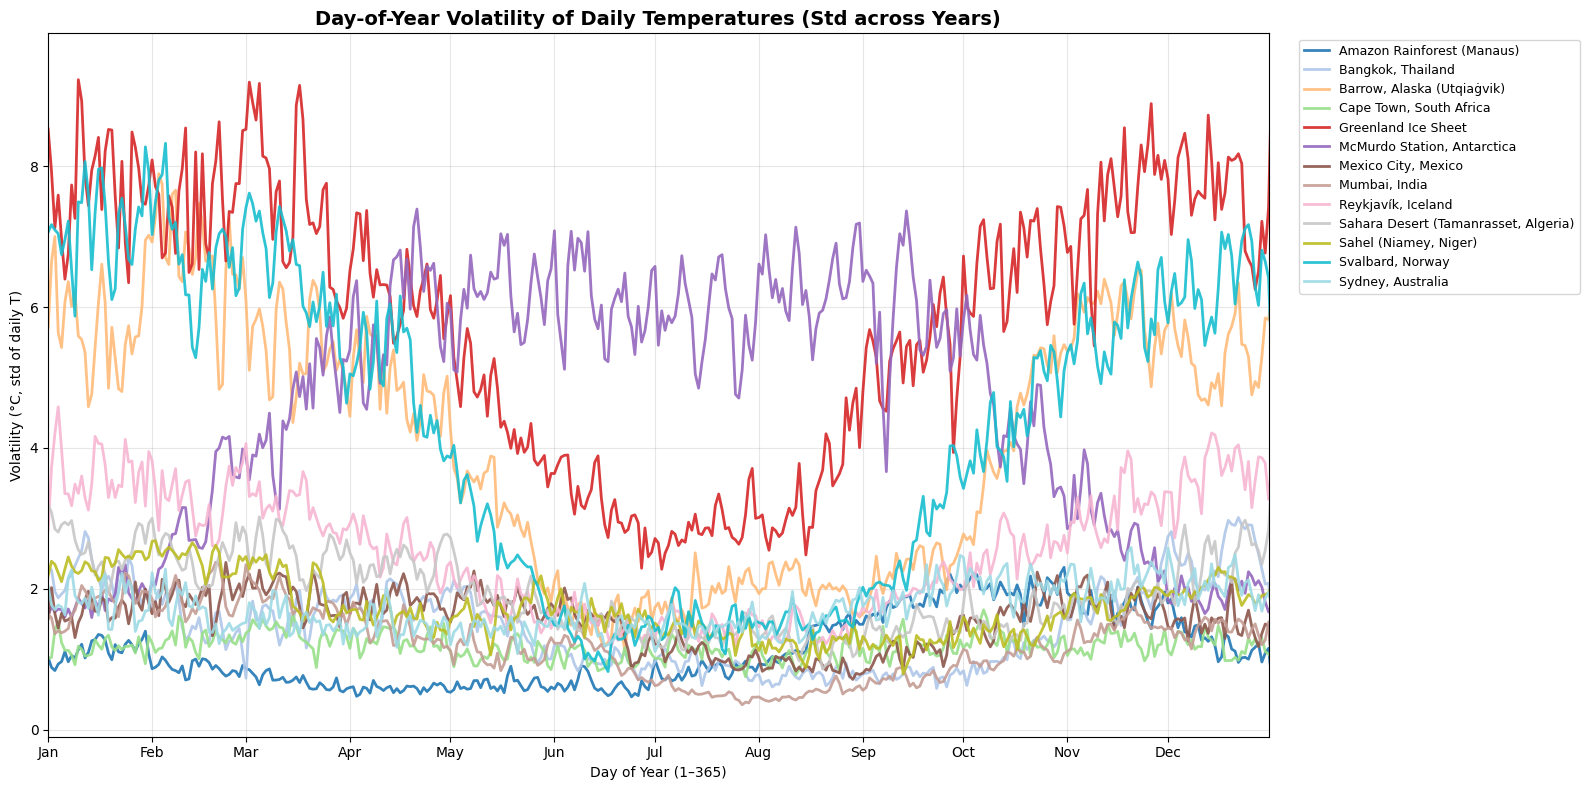

✅ Day-of-year volatility plot saved to /content/drive/MyDrive/TDS/Climate/figures/dayofyear_volatility.png


In [ ]:
# ============================================================
# Day-of-Year Volatility of T (std across years) for each City
# - One "synthetic" year on the x-axis (DOY 1..365)
# - Excludes Feb 29 for consistency across years
# - Saves CSV + figure under your OUT_DIR
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from pathlib import Path
from datetime import date

# ---------- Config ----------
CSV_PATH = "/content/drive/MyDrive/TDS/Climate/result.csv"
OUT_DIR  = Path("/content/drive/MyDrive/TDS/Climate")
FIG_DIR  = OUT_DIR / "figures"
VOL_DIR  = OUT_DIR / "volatility"

FIG_DIR.mkdir(parents=True, exist_ok=True)
VOL_DIR.mkdir(parents=True, exist_ok=True)

FIG_PATH = FIG_DIR / "dayofyear_volatility.png"
VOL_CSV  = VOL_DIR / "dayofyear_volatility.csv"

# ---------- Mount & load ----------
drive.mount('/content/drive', force_remount=True)
print(f"Using file: {CSV_PATH}")

df = pd.read_csv(CSV_PATH, parse_dates=["Date"])
df = df[["Date", "City", "T"]].dropna().copy()

# Basic cleaning: keep plausible temps
df = df[(df["T"] >= -100) & (df["T"] <= 100)].copy()

# Remove Feb 29 so every year has 365 comparable days
df["Month"] = df["Date"].dt.month
df["Day"]   = df["Date"].dt.day
df = df[~((df["Month"] == 2) & (df["Day"] == 29))].copy()

# Day-of-year in a non-leap sense (since Feb 29 removed, pandas dayofyear works)
df["DOY"] = df["Date"].dt.dayofyear

# ---------- Compute DOY volatility (std across all years) ----------
doy_vol = (
    df.groupby(["City", "DOY"])["T"]
      .std()
      .reset_index(name="Volatility")
)

# Save tidy CSV
doy_vol.to_csv(VOL_CSV, index=False)
print(f"✅ Saved day-of-year volatility to {VOL_CSV}")

# ---------- Plot ----------
fig, ax = plt.subplots(figsize=(16, 8))

cities = doy_vol["City"].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(cities)))

for i, city in enumerate(cities):
    d = doy_vol[doy_vol["City"] == city].sort_values("DOY")
    ax.plot(
        d["DOY"], d["Volatility"],
        linewidth=2, alpha=0.9,
        color=colors[i % len(colors)], label=city
    )

# Month tick marks for readability (non-leap year reference)
month_starts = [date(2001, m, 1).timetuple().tm_yday for m in range(1, 13)]
month_labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

ax.set_title("Day-of-Year Volatility of Daily Temperatures (Std across Years)", fontsize=14, weight="bold")
ax.set_xlabel("Day of Year (1–365)")
ax.set_ylabel("Volatility (°C, std of daily T)")
ax.set_xlim(1, 365)
ax.set_xticks(month_starts)
ax.set_xticklabels(month_labels)
ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=9, frameon=True)

fig.tight_layout()
plt.savefig(FIG_PATH, dpi=300, bbox_inches="tight")
plt.show()
print(f"✅ Day-of-year volatility plot saved to {FIG_PATH}")

# ---- Optional smoothing (uncomment to show 7-day MA curves instead of raw) ----
# for i, city in enumerate(cities):
#     d = doy_vol[doy_vol["City"] == city].sort_values("DOY").copy()
#     d["Volatility_SMA7"] = d["Volatility"].rolling(7, center=True, min_periods=3).mean()
#     ax.plot(d["DOY"], d["Volatility_SMA7"], linewidth=2.5, alpha=0.9,
#             color=colors[i % len(colors)], linestyle="--")


In [6]:
from pathlib import Path   # ✅ add this

# --------------------
# Config
# --------------------
CITY        = "Mumbai, India"
SEED        = 42
SPLIT_FRAC  = 0.80
MEAN_HARM   = 2
VOL_HARM    = 3
LJUNG_LAGS  = 10
EPS         = 1e-12
MIN_TEST_N  = 8

# ✅ save under TDS/Climate now
BASE_DIR    = Path("/content/drive/MyDrive/TDS/Climate")
OUT_BASE    = BASE_DIR / "Benth_Mumbai"
PLOTS_DIR   = OUT_BASE / "plots"
OUT_BASE.mkdir(parents=True, exist_ok=True)
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

# Input still comes from Temperature_DAT*.csv in TDS/Climate
CSV_CANDIDATES = sorted(glob.glob(str(BASE_DIR / "Temperature_DAT*.csv")))



NameError: name 'glob' is not defined

In [7]:
# ============================================================
# Mumbai-only Benth–Benth using climate_data.csv
# Reads:  /content/drive/MyDrive/TDS/Climate/climate_data.csv
# Saves:  /content/drive/MyDrive/TDS/Climate/Benth_Mumbai/
# ============================================================

# (Colab mount; safe no-op elsewhere)
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
except Exception:
    pass

# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings, re, sys, platform, datetime as dt
from pathlib import Path

from statsmodels.formula.api import ols
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import norm, probplot

# Optional GH family for heavier tails in plots (ignored if unavailable)
try:
    from scipy.stats import genhyperbolic as hyp_dist
    HYP_NAME = "genhyperbolic"
except Exception:
    hyp_dist = None
    HYP_NAME = None

# --------------------
# Config
# --------------------
CITY        = "Mumbai, India"
SEED        = 42
SPLIT_FRAC  = 0.80
MEAN_HARM   = 2
VOL_HARM    = 3
LJUNG_LAGS  = 10
EPS         = 1e-12
MIN_TEST_N  = 8

BASE_DIR    = Path("/content/drive/MyDrive/TDS/Climate")
OUT_BASE    = BASE_DIR / "Benth_Mumbai"
PLOTS_DIR   = OUT_BASE / "plots"
OUT_BASE.mkdir(parents=True, exist_ok=True)
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

CSV_PATH    = BASE_DIR / "climate_data.csv"   # ✅ your file

np.random.seed(SEED)

# --------------------
# Helpers
# --------------------
def add_time_features(df: pd.DataFrame, k_max: int) -> pd.DataFrame:
    out = df.copy()
    out["doy"] = out["Date"].dt.dayofyear
    out["trend"] = out.groupby("City")["Date"].transform(lambda s: (s - s.iloc[0]).dt.days)
    for k in range(1, k_max + 1):
        out[f"cos{k}"] = np.cos(2*np.pi*k*out["doy"]/365.0)
        out[f"sin{k}"] = np.sin(2*np.pi*k*out["doy"]/365.0)
    return out

def fit_mean_model(train_df: pd.DataFrame, mean_terms: list):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return ols("DAT ~ " + " + ".join(mean_terms), data=train_df).fit()

def fit_ar1(x_train: pd.Series):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return AutoReg(x_train, lags=1, trend="n").fit()

def ljungbox_pvalue(series, lags=LJUNG_LAGS):
    try:
        lb = acorr_ljungbox(series, lags=[lags], return_df=True)
        return float(lb["lb_pvalue"].iloc[0])
    except Exception:
        return np.nan

def fit_volatility_model(train_df: pd.DataFrame, innov: np.ndarray, vol_terms: list):
    log_eps2 = np.log(innov**2 + EPS)
    feats = train_df.iloc[1:][vol_terms].copy()  # align with AR residuals index
    if len(feats) < max(20, 2*len(vol_terms) + 5):
        return None
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        try:
            return ols("log_eps2 ~ " + " + ".join(vol_terms),
                       data=feats.assign(log_eps2=log_eps2)).fit()
        except Exception:
            return None

def predict_sigma_hat(model, df_with_feats: pd.DataFrame, vol_terms: list) -> np.ndarray:
    if model is None:
        return np.full(len(df_with_feats), np.nan, dtype=float)
    Xbeta = np.asarray(model.predict(df_with_feats[vol_terms]), dtype=float)
    return np.exp(0.5 * Xbeta)

def one_step_forecast_test(train_df, test_df, mean_fit, phi, mean_terms):
    preds, resid, mu_t_list = [], [], []
    mu_train_last = float(mean_fit.predict(train_df).iloc[-1])
    x_prev = float(train_df["DAT"].iloc[-1] - mu_train_last)
    for _, row in test_df.iterrows():
        row_df = pd.DataFrame({c: [row[c]] for c in mean_terms})
        mu_t = float(mean_fit.predict(row_df).iloc[0])
        y_hat = mu_t + phi * x_prev
        e_t = float(row["DAT"] - y_hat)
        preds.append(y_hat); resid.append(e_t); mu_t_list.append(mu_t)
        x_prev = float(row["DAT"] - mu_t)  # update using observed DAT
    return np.array(preds, float), np.array(resid, float), np.array(mu_t_list, float)

def slug(s: str) -> str:
    return re.sub(r'[^A-Za-z0-9]+', '_', str(s)).strip('_')

# --------------------
# Load climate_data.csv and coerce temperature column to DAT
# --------------------
df_all = pd.read_csv(CSV_PATH, parse_dates=["Date"])
# Try to find a temperature column; prefer 'DAT' else common aliases.
if "DAT" not in df_all.columns:
    for cand in ["T", "T2M", "Temperature", "temp", "Temp"]:
        if cand in df_all.columns:
            df_all = df_all.rename(columns={cand: "DAT"})
            break
if "DAT" not in df_all.columns:
    raise ValueError("Couldn't find a temperature column. Expected one of: DAT, T, T2M, Temperature, temp, Temp.")

required = {"Date", "City", "DAT"}
missing = required - set(df_all.columns)
if missing:
    raise ValueError(f"Missing required columns in climate_data.csv: {missing}")

df_all = df_all.sort_values(["City","Date"]).reset_index(drop=True)

# Filter to Mumbai
if CITY not in set(df_all["City"].unique()):
    avail = sorted(df_all["City"].unique().tolist())[:15]
    raise ValueError(f"City '{CITY}' not found in climate_data.csv. A few examples present: {avail} ...")
df = df_all[df_all["City"] == CITY].copy().reset_index(drop=True)

# --------------------
# Features and design
# --------------------
KMAX = max(MEAN_HARM, VOL_HARM)
df = add_time_features(df, KMAX)
MEAN_TERMS = ["trend"] + [f"{b}{k}" for k in range(1, MEAN_HARM+1) for b in ("cos","sin")]
VOL_TERMS  = [f"{b}{k}" for k in range(1, VOL_HARM +1) for b in ("cos","sin")]

# --------------------
# Train/Test split (time-ordered)
# --------------------
n = len(df)
if n < 6:
    raise ValueError(f"Too few rows for {CITY}: {n}")
split = int(SPLIT_FRAC * n)
train, test = df.iloc[:split].copy(), df.iloc[split:].copy()

# --------------------
# Fit mean, AR(1), volatility
# --------------------
mean_fit = fit_mean_model(train, MEAN_TERMS)
mu_train = mean_fit.predict(train)
x_train  = train["DAT"] - mu_train

ar_fit = fit_ar1(x_train)
phi = float(ar_fit.params.iloc[0]) if len(ar_fit.params) else np.nan
ar_lb_p = ljungbox_pvalue(ar_fit.resid, lags=LJUNG_LAGS)

train_dates_eff = train["Date"].iloc[1:].values
e_train = ar_fit.resid.astype(float).values

vol_fit = fit_volatility_model(train, e_train, VOL_TERMS)

# --------------------
# One-step ahead forecast on TEST
# --------------------
preds_test, res_test, mu_test = one_step_forecast_test(train, test, mean_fit, phi, MEAN_TERMS)

# --------------------
# Standardize residuals with seasonal σ̂(t)
# --------------------
sigma_tr = predict_sigma_hat(vol_fit, train.iloc[1:], VOL_TERMS)
z_tr = e_train / np.maximum(np.sqrt(EPS), sigma_tr)

sigma_te = predict_sigma_hat(vol_fit, test, VOL_TERMS)
z_te = res_test / np.maximum(np.sqrt(EPS), sigma_te)

# --------------------
# Quick summary
# --------------------
y_te = test["DAT"].values
rmse = float(np.sqrt(np.mean((y_te - preds_test)**2))) if len(y_te) else np.nan
mae  = float(np.mean(np.abs(y_te - preds_test))) if len(y_te) else np.nan
mape = float(np.mean(np.abs((y_te - preds_test) / np.maximum(1e-8, np.abs(y_te))))) if len(y_te) else np.nan
mean_r2 = float(mean_fit.rsquared)
vol_r2  = float(getattr(vol_fit, "rsquared", np.nan)) if vol_fit else np.nan

print(f"=== {CITY} ===")
print(f"Rows: total={n}, train={len(train)}, test={len(test)}")
print(f"Mean R^2: {mean_r2:.4f}")
print(f"AR(1) phi: {phi:.4f}  | Ljung-Box p@{LJUNG_LAGS}: {ar_lb_p:.4f}")
print(f"Vol (log-var) R^2: {vol_r2 if np.isfinite(vol_r2) else np.nan:.4f}")
print(f"Test RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.4f}")

# --------------------
# Save outputs under TDS/Climate/Benth_Mumbai/
# --------------------
def slug(s: str) -> str:
    return re.sub(r'[^A-Za-z0-9]+', '_', str(s)).strip('_')
m_slug = slug(CITY)

pd.DataFrame({
    "Date": train_dates_eff, "City": CITY, "Residual": e_train,
    "sigma_hat": sigma_tr, "z": z_tr
}).to_csv(OUT_BASE / f"{m_slug}_train_residuals.csv", index=False)

pd.DataFrame({
    "Date": test["Date"].values, "City": CITY, "y_hat": preds_test,
    "Residual": res_test, "sigma_hat": sigma_te, "z": z_te
}).to_csv(OUT_BASE / f"{m_slug}_test_residuals.csv", index=False)

pd.DataFrame({
    "Date": train["Date"].iloc[1:].values,
    "City": CITY,
    "DAT": train["DAT"].iloc[1:].values.astype(float),
    "mu_hat": mu_train.iloc[1:].values.astype(float),
    "x_t": x_train.iloc[1:].values.astype(float),
    "e_t": e_train.astype(float),
    "sigma_hat": sigma_tr.astype(float),
    "z_t": z_tr.astype(float)
}).to_csv(OUT_BASE / f"{m_slug}_fitted_train.csv", index=False)

pd.DataFrame({
    "Date": test["Date"].values,
    "City": CITY,
    "DAT": test["DAT"].values.astype(float),
    "mu_hat": mu_test.astype(float),
    "y_hat": preds_test.astype(float),
    "e_t": res_test.astype(float),
    "sigma_hat": sigma_te.astype(float),
    "z_t": z_te.astype(float)
}).to_csv(OUT_BASE / f"{m_slug}_fitted_test.csv", index=False)

pd.DataFrame([{
    "city": CITY,
    "source_csv": str(CSV_PATH),
    "split_frac": SPLIT_FRAC,
    "mean_harm": MEAN_HARM,
    "vol_harm": VOL_HARM,
    "ljung_lags": LJUNG_LAGS,
    "python": sys.version.split()[0],
    "platform": platform.platform(),
    "timestamp": dt.datetime.now().isoformat(timespec="seconds")
}]).to_csv(OUT_BASE / f"{m_slug}_run_meta.csv", index=False)

# --------------------
# Plots
# --------------------
def save_hist_and_qq(arr, split_label):
    arr = np.asarray(arr, float)
    if arr.size < MIN_TEST_N:
        return
    mu, sd = arr.mean(), arr.std(ddof=1)

    # 1) Histogram + Normal (and GH if available)
    fig = plt.figure(figsize=(7,4.2))
    plt.hist(arr, bins=40, density=True, alpha=0.5, label="Empirical")
    if np.isfinite(sd) and sd > 0:
        x = np.linspace(mu - 4*sd, mu + 4*sd, 600)
        plt.plot(x, norm.pdf(x, mu, sd), linewidth=2, label="Normal fit")
    if hyp_dist is not None:
        try:
            hyp_params = hyp_dist.fit(arr)
            xh = np.linspace(np.percentile(arr, 0.5), np.percentile(arr, 99.5), 600)
            plt.plot(xh, hyp_dist.pdf(xh, *hyp_params), linewidth=2, label=f"{HYP_NAME} fit")
        except Exception:
            pass
    plt.title(f"{CITY} – {split_label} full residuals (z)")
    plt.xlabel("z_t"); plt.ylabel("Density"); plt.legend()
    fig.tight_layout()
    fig.savefig(PLOTS_DIR / f"{m_slug}_{split_label}_hist.png", dpi=150)
    plt.close(fig)

    # 2) QQ vs Normal
    fig2 = plt.figure(figsize=(5.2,5.2))
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        probplot(arr, dist="norm", sparams=(), plot=plt)
    plt.title(f"{CITY} – {split_label} QQ (Normal)")
    fig2.tight_layout()
    fig2.savefig(PLOTS_DIR / f"{m_slug}_{split_label}_qq.png", dpi=150)
    plt.close(fig2)

    # 3) QQ vs GH (if available)
    if hyp_dist is not None:
        try:
            hyp_params = hyp_dist.fit(arr)
            n = arr.size
            u = (np.arange(1, n+1) - 0.5) / n
            u = np.clip(u, 1e-6, 1-1e-6)
            q_theory = hyp_dist.ppf(u, *hyp_params)
            q_sample = np.sort(arr)
            fig3 = plt.figure(figsize=(5.2,5.2))
            plt.scatter(q_theory, q_sample, s=10)
            # reference line
            t_mean, s_mean = np.mean(q_theory), np.mean(q_sample)
            t_std,  s_std  = np.std(q_theory), np.std(q_sample, ddof=1)
            if t_std > 0:
                b = s_std / t_std
                a = s_mean - b * t_mean
                xline = np.linspace(np.nanmin(q_theory), np.nanmax(q_theory), 2)
                plt.plot(xline, a + b*xline, linewidth=2)
            plt.title(f"{CITY} – {split_label} QQ ({HYP_NAME})")
            plt.xlabel("Theoretical quantiles"); plt.ylabel("Sample quantiles")
            fig3.tight_layout()
            fig3.savefig(PLOTS_DIR / f"{m_slug}_{split_label}_qq_hyp.png", dpi=150)
            plt.close(fig3)
        except Exception:
            pass

save_hist_and_qq(z_tr, "train")
save_hist_and_qq(z_te, "test")

print("✅ Mumbai run complete.")
print("→ Outputs:", OUT_BASE)
print("→ Plots folder:", PLOTS_DIR)


Mounted at /content/drive
=== Mumbai, India ===
Rows: total=16071, train=12856, test=3215
Mean R^2: 0.7787
AR(1) phi: 0.8608  | Ljung-Box p@10: 0.0000
Vol (log-var) R^2: 0.1207
Test RMSE: 0.6635 | MAE: 0.4760 | MAPE: 0.0182
✅ Mumbai run complete.
→ Outputs: /content/drive/MyDrive/TDS/Climate/Benth_Mumbai
→ Plots folder: /content/drive/MyDrive/TDS/Climate/Benth_Mumbai/plots


✅ Diagnostics saved to: /content/drive/MyDrive/TDS/Climate/Benth_Mumbai/diagnostics


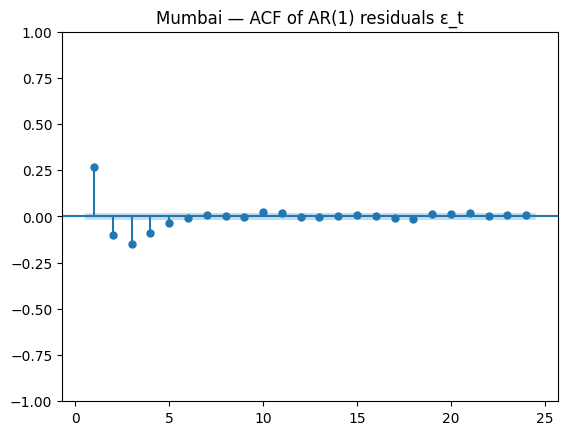

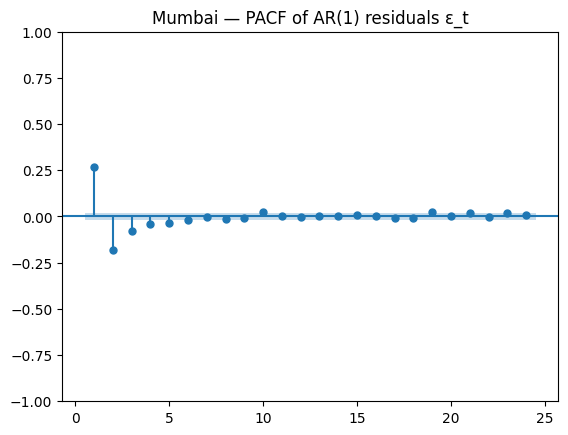

In [8]:
# ============================================================
# Mumbai diagnostics & visuals:
# - Mean residuals & fit details
# - AR(1) visuals & fit
# - Volatility regression visuals & coefficients
# Saves to: TDS/Climate/Benth_Mumbai/diagnostics/
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import warnings, io, textwrap

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

DIAG_DIR = OUT_BASE / "diagnostics"
DIAG_DIR.mkdir(parents=True, exist_ok=True)

m_slug = "Mumbai_India"  # consistent slugging

# ---------------------------
# 0) Utility: save summary() to text file + pretty print top terms
# ---------------------------
def save_model_summary_txt(model, path: Path):
    try:
        with open(path, "w") as f:
            f.write(str(model.summary()))
    except Exception as e:
        print("Could not save summary:", e)

def coef_ci_frame(model, alpha=0.05):
    params = model.params
    bse = getattr(model, "bse", pd.Series(index=params.index, data=np.nan))
    df = pd.DataFrame({
        "term": params.index,
        "estimate": params.values,
        "stderr": bse.values
    })
    # Normal approx 95% CI
    z = 1.959963984540054
    df["lo"] = df["estimate"] - z*df["stderr"]
    df["hi"] = df["estimate"] + z*df["stderr"]
    return df

# =================================================================
# 1) MEAN: residuals after fitting the seasonal mean + fit details
# =================================================================
# Residuals after mean (before AR): x_t = DAT - mu_hat
mu_train = mean_fit.predict(train)
x_train = train["DAT"] - mu_train

# Save mean summary
save_model_summary_txt(mean_fit, DIAG_DIR / f"{m_slug}_mean_OLS_summary.txt")

# Plot: DAT and mean fit over time (train + test)
fig = plt.figure(figsize=(12,5))
plt.plot(train["Date"], train["DAT"], lw=1, alpha=0.8, label="DAT (train)")
plt.plot(train["Date"], mu_train, lw=2, label="μ̂(t) (train)")
# test mean values
mu_test = mean_fit.predict(test[["trend"] + [c for c in train.columns if c.startswith(("cos","sin"))][:2*MEAN_HARM]])
plt.plot(test["Date"], test["DAT"], lw=1, alpha=0.8, label="DAT (test)")
plt.plot(test["Date"], mu_test, lw=2, label="μ̂(t) (test)")
plt.title("Mumbai — DAT and seasonal mean fit")
plt.xlabel("Date"); plt.ylabel("Temperature (DAT)")
plt.legend()
fig.tight_layout(); fig.savefig(DIAG_DIR / f"{m_slug}_mean_fit_timeseries.png", dpi=160); plt.close(fig)

# Plot: mean residuals x_t time series (train)
fig = plt.figure(figsize=(12,4))
plt.plot(train["Date"], x_train, lw=1)
plt.axhline(0, color="k", lw=1)
plt.title("Mumbai — Residuals after mean fit (x_t = DAT - μ̂)")
plt.xlabel("Date"); plt.ylabel("x_t")
fig.tight_layout(); fig.savefig(DIAG_DIR / f"{m_slug}_mean_residuals_timeseries.png", dpi=160); plt.close(fig)

# Plot: histogram + QQ of x_t
fig = plt.figure(figsize=(6.5,4))
plt.hist(x_train, bins=40, alpha=0.7)
plt.title("Mumbai — Histogram of mean residuals x_t")
plt.xlabel("x_t"); plt.ylabel("Count")
fig.tight_layout(); fig.savefig(DIAG_DIR / f"{m_slug}_mean_residuals_hist.png", dpi=160); plt.close(fig)

fig = plt.figure(figsize=(5,5))
from scipy.stats import probplot
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    probplot(x_train, dist="norm", plot=plt)
plt.title("Mumbai — QQ plot of mean residuals x_t (Normal)")
fig.tight_layout(); fig.savefig(DIAG_DIR / f"{m_slug}_mean_residuals_qq.png", dpi=160); plt.close(fig)

# Plot: mean coefficients with 95% CI
mean_coef = coef_ci_frame(mean_fit).sort_values("estimate")
fig = plt.figure(figsize=(8, max(4, 0.4*len(mean_coef))))
y = np.arange(len(mean_coef))
plt.errorbar(mean_coef["estimate"], y, xerr=1.96*mean_coef["stderr"], fmt="o", capsize=3)
plt.yticks(y, mean_coef["term"])
plt.axvline(0, color="k", lw=1)
plt.title("Mumbai — Mean model coefficients (95% CI)")
plt.xlabel("Estimate")
fig.tight_layout(); fig.savefig(DIAG_DIR / f"{m_slug}_mean_coefficients.png", dpi=160); plt.close(fig)

# =======================================================
# 2) AR(1): visuals of process and fitted relationship
# =======================================================
# AR fit objects from prior cell:
# ar_fit, e_train = ar_fit.resid, phi = ar_fit.params.iloc[0]

phi = float(ar_fit.params.iloc[0]) if len(ar_fit.params) else np.nan
save_model_summary_txt(ar_fit, DIAG_DIR / f"{m_slug}_ar1_summary.txt")

# Scatter: x_t vs x_{t-1} with fitted line φ x_{t-1}
x_t = x_train.iloc[1:].values
x_tm1 = x_train.iloc[:-1].values
x_pred = phi * x_tm1
fig = plt.figure(figsize=(5.8,5.2))
plt.scatter(x_tm1, x_t, s=10, alpha=0.6, label="Observed")
# line through origin with slope φ
xline = np.linspace(np.min(x_tm1), np.max(x_tm1), 2)
plt.plot(xline, phi*xline, lw=2, label=f"Fitted: x_t = {phi:.3f} x_(t-1)")
plt.title("Mumbai — AR(1) scatter: x_t vs x_{t-1}")
plt.xlabel("x_{t-1}"); plt.ylabel("x_t"); plt.legend()
fig.tight_layout(); fig.savefig(DIAG_DIR / f"{m_slug}_ar1_scatter.png", dpi=160); plt.close(fig)

# Time series: x_t and φ x_{t-1}
fig = plt.figure(figsize=(12,4))
plt.plot(train["Date"].iloc[1:], x_t, lw=1, label="x_t")
plt.plot(train["Date"].iloc[1:], x_pred, lw=2, label=r"$\hat{x}_t = \phi x_{t-1}$")
plt.axhline(0, color="k", lw=1)
plt.title("Mumbai — AR(1) fitted vs observed deviations")
plt.xlabel("Date"); plt.ylabel("x_t")
plt.legend()
fig.tight_layout(); fig.savefig(DIAG_DIR / f"{m_slug}_ar1_timeseries_fit.png", dpi=160); plt.close(fig)

# AR residuals ε_t time series
e_train = ar_fit.resid.astype(float).values
fig = plt.figure(figsize=(12,4))
plt.plot(train["Date"].iloc[1:], e_train, lw=1)
plt.axhline(0, color="k", lw=1)
plt.title("Mumbai — AR(1) residuals ε_t")
plt.xlabel("Date"); plt.ylabel("ε_t")
fig.tight_layout(); fig.savefig(DIAG_DIR / f"{m_slug}_ar1_residuals_timeseries.png", dpi=160); plt.close(fig)

# ACF/PACF of AR residuals
fig = plt.figure(figsize=(8,3.5))
plot_acf(e_train, lags=24, zero=False)
plt.title("Mumbai — ACF of AR(1) residuals ε_t")
fig.tight_layout(); fig.savefig(DIAG_DIR / f"{m_slug}_ar1_residuals_acf.png", dpi=160); plt.close(fig)

fig = plt.figure(figsize=(8,3.5))
plot_pacf(e_train, lags=24, zero=False, method="ywm")
plt.title("Mumbai — PACF of AR(1) residuals ε_t")
fig.tight_layout(); fig.savefig(DIAG_DIR / f"{m_slug}_ar1_residuals_pacf.png", dpi=160); plt.close(fig)

# Save a tiny CSV with AR phi & Ljung-Box
from statsmodels.stats.diagnostic import acorr_ljungbox
try:
    lb = acorr_ljungbox(e_train, lags=[10], return_df=True)
    lb_p = float(lb["lb_pvalue"].iloc[0])
    lb_stat = float(lb["lb_stat"].iloc[0])
except Exception:
    lb_p = np.nan; lb_stat = np.nan

pd.DataFrame([{"phi": phi, "ljungbox_stat_lag10": lb_stat, "ljungbox_p_lag10": lb_p}])\
    .to_csv(DIAG_DIR / f"{m_slug}_ar1_diagnostics.csv", index=False)

# =======================================================
# 3) Volatility regression: visuals & coefficients
# =======================================================
if vol_fit is not None:
    # log(e_t^2) vs fitted over time (train)
    log_eps2 = np.log(e_train**2 + 1e-12)
    # Fitted log-variance aligns with train rows from index 1:
    feats = train.iloc[1:][[c for c in train.columns if c.startswith(("cos","sin"))][:2*VOL_HARM]]
    # The design columns used:
    vol_terms = [f"{b}{k}" for k in range(1, VOL_HARM + 1) for b in ("cos","sin")]
    Xbeta = np.asarray(vol_fit.predict(train.iloc[1:][vol_terms]), dtype=float)

    # Time plot of observed vs fitted log-variance
    fig = plt.figure(figsize=(12,4))
    plt.plot(train["Date"].iloc[1:], log_eps2, lw=1, label="log(ε_t^2)")
    plt.plot(train["Date"].iloc[1:], Xbeta, lw=2, label="Fitted log-variance")
    plt.title("Mumbai — Volatility regression (log ε_t^2)")
    plt.xlabel("Date"); plt.ylabel("log variance")
    plt.legend()
    fig.tight_layout(); fig.savefig(DIAG_DIR / f"{m_slug}_volatility_logvar_timeseries.png", dpi=160); plt.close(fig)

    # Sigma hat over time (train + test)
    fig = plt.figure(figsize=(12,4))
    plt.plot(train["Date"].iloc[1:], sigma_tr, lw=1.5, label="σ̂ (train)")
    if 'sigma_te' in globals():
        plt.plot(test["Date"], sigma_te, lw=1.5, label="σ̂ (test)")
    plt.title("Mumbai — Conditional volatility σ̂(t)")
    plt.xlabel("Date"); plt.ylabel("σ̂")
    plt.legend()
    fig.tight_layout(); fig.savefig(DIAG_DIR / f"{m_slug}_volatility_sigma_timeseries.png", dpi=160); plt.close(fig)

    # Coefficients (with CI) of volatility regression
    vol_coef = coef_ci_frame(vol_fit).sort_values("estimate")
    fig = plt.figure(figsize=(8, max(4, 0.4*len(vol_coef))))
    y = np.arange(len(vol_coef))
    plt.errorbar(vol_coef["estimate"], y, xerr=1.96*vol_coef["stderr"], fmt="o", capsize=3)
    plt.yticks(y, vol_coef["term"])
    plt.axvline(0, color="k", lw=1)
    plt.title("Mumbai — Volatility model coefficients (95% CI)")
    plt.xlabel("Estimate")
    fig.tight_layout(); fig.savefig(DIAG_DIR / f"{m_slug}_volatility_coefficients.png", dpi=160); plt.close(fig)

    # Save full vol summary too
    save_model_summary_txt(vol_fit, DIAG_DIR / f"{m_slug}_volatility_summary.txt")
else:
    print("Volatility model not available (too few points or regression failed). Skipping vol plots.")

print("✅ Diagnostics saved to:", DIAG_DIR)


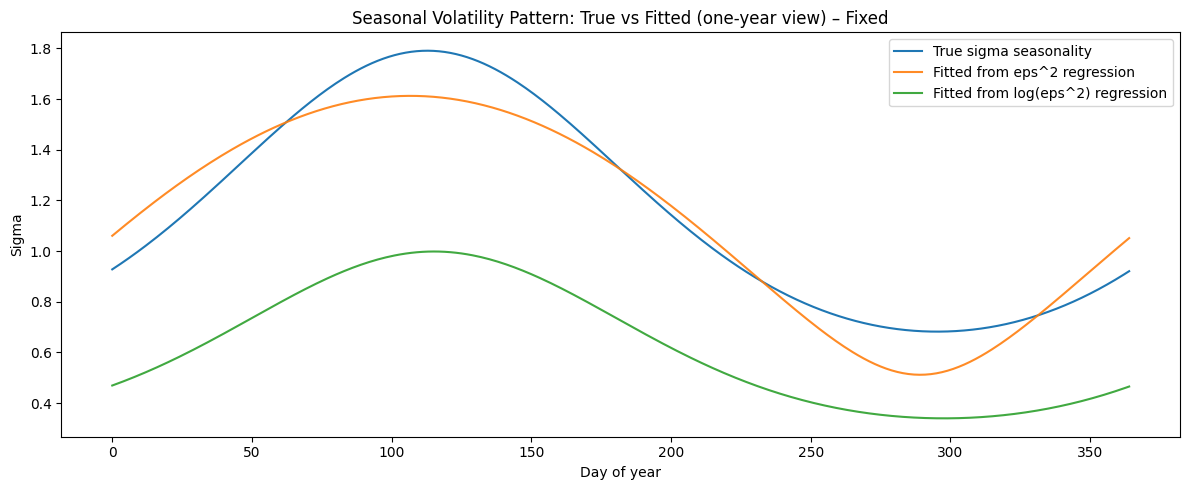


OUTLIER SCENARIO (5% of days have 10x shocks) — illustrating instability when using eps^2 directly
  MAE  (sigma):  raw eps^2 regression = 2.3231   |   log(eps^2) regression = 0.4253
  MAPE (sigma):  raw eps^2 regression = 197.77% |   log(eps^2) regression = 36.62%
  Negative variance predictions before clipping (raw fit): 16.99%


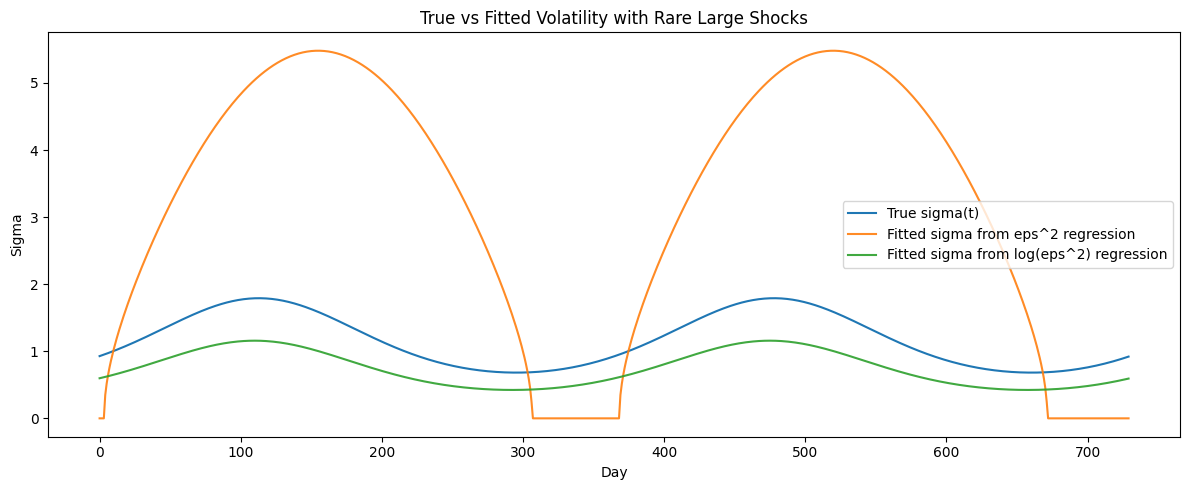

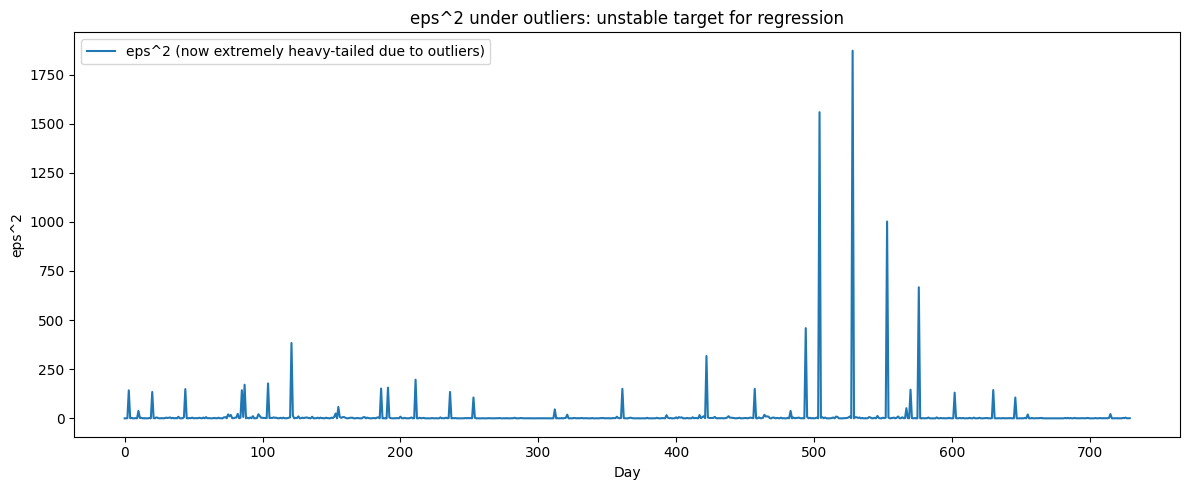

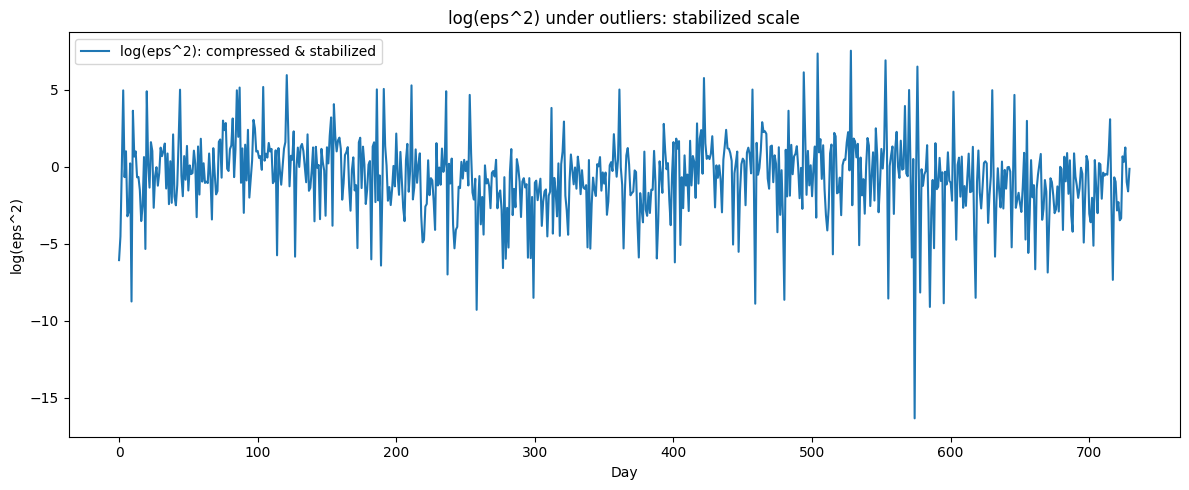

In [9]:
# Fix the seasonal plot from the previous cell (indexing bug) and
# add a *second scenario* with rare large outliers to illustrate instability
# when regressing on skewed eps^2 directly.

import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# 1) Seasonal view (fixed indexing)
# ------------------------------
# Recreate the arrays from the prior simulation cell by re-executing the same seed & setup
np.random.seed(7)
n_days = 730
t = np.arange(n_days)
omega = 2 * np.pi / 365.0
a_true, b_true, c_true = 0.2, 0.9, -0.35
log_var_true = a_true + b_true * np.sin(omega * t) + c_true * np.cos(omega * t)
sigma_true = np.exp(0.5 * log_var_true)
z = np.random.normal(size=n_days)
eps = sigma_true * z
eps2 = eps**2
X = np.column_stack([np.ones(n_days), np.sin(omega * t), np.cos(omega * t)])
beta_A, *_ = np.linalg.lstsq(X, eps2, rcond=None)
var_hat_A = X @ beta_A
var_hat_A = np.clip(var_hat_A, 1e-8, None)
sigma_hat_A = np.sqrt(var_hat_A)
eps_safe = 1e-12
y_log = np.log(eps2 + eps_safe)
beta_B, *_ = np.linalg.lstsq(X, y_log, rcond=None)
log_var_hat_B = X @ beta_B
sigma_hat_B = np.exp(0.5 * log_var_hat_B)

doy = t % 365
order365 = np.argsort(doy[:365])

def seasonal_mean(x):
    return 0.5 * (x[:365] + x[365:730])

plt.figure(figsize=(12, 5))
plt.plot(np.sort(doy[:365]), seasonal_mean(sigma_true)[order365], label="True sigma seasonality")
plt.plot(np.sort(doy[:365]), seasonal_mean(sigma_hat_A)[order365], label="Fitted from eps^2 regression", alpha=0.9)
plt.plot(np.sort(doy[:365]), seasonal_mean(sigma_hat_B)[order365], label="Fitted from log(eps^2) regression", alpha=0.9)
plt.title("Seasonal Volatility Pattern: True vs Fitted (one-year view) – Fixed")
plt.xlabel("Day of year")
plt.ylabel("Sigma")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------
# 2) OUTLIER SCENARIO to illustrate instability
# ------------------------------
np.random.seed(21)

def run_scenario(n_days=730, outlier_rate=0.05, outlier_scale=8.0):
    t = np.arange(n_days)
    omega = 2 * np.pi / 365.0
    a_true, b_true, c_true = 0.2, 0.9, -0.35
    log_var_true = a_true + b_true * np.sin(omega * t) + c_true * np.cos(omega * t)
    sigma_true = np.exp(0.5 * log_var_true)
    z = np.random.normal(size=n_days)

    # Inject rare, huge shocks (heavy tails / skewed eps^2)
    mask = np.random.rand(n_days) < outlier_rate
    z[mask] *= outlier_scale

    eps = sigma_true * z
    eps2 = eps**2

    X = np.column_stack([np.ones(n_days), np.sin(omega * t), np.cos(omega * t)])

    # Fit A: eps^2 on X
    beta_A, *_ = np.linalg.lstsq(X, eps2, rcond=None)
    var_hat_A_raw = X @ beta_A
    neg_frac = np.mean(var_hat_A_raw < 0.0)
    var_hat_A = np.clip(var_hat_A_raw, 1e-8, None)
    sigma_hat_A = np.sqrt(var_hat_A)

    # Fit B: log(eps^2) on X
    y_log = np.log(eps2 + 1e-12)
    beta_B, *_ = np.linalg.lstsq(X, y_log, rcond=None)
    log_var_hat_B = X @ beta_B
    sigma_hat_B = np.exp(0.5 * log_var_hat_B)

    # Metrics
    mae = lambda a, b: np.mean(np.abs(a - b))
    mape = lambda a, b: np.mean(np.abs((a - b) / (a + 1e-12))) * 100

    mae_A = mae(sigma_true, sigma_hat_A)
    mae_B = mae(sigma_true, sigma_hat_B)
    mape_A = mape(sigma_true, sigma_hat_A)
    mape_B = mape(sigma_true, sigma_hat_B)

    return {
        "t": t,
        "sigma_true": sigma_true,
        "sigma_hat_A": sigma_hat_A,
        "sigma_hat_B": sigma_hat_B,
        "eps2": eps2,
        "y_log": y_log,
        "neg_frac": neg_frac,
        "mae_A": mae_A, "mae_B": mae_B,
        "mape_A": mape_A, "mape_B": mape_B
    }

res = run_scenario(outlier_rate=0.05, outlier_scale=10.0)
print("\nOUTLIER SCENARIO (5% of days have 10x shocks) — illustrating instability when using eps^2 directly")
print(f"  MAE  (sigma):  raw eps^2 regression = {res['mae_A']:.4f}   |   log(eps^2) regression = {res['mae_B']:.4f}")
print(f"  MAPE (sigma):  raw eps^2 regression = {res['mape_A']:.2f}% |   log(eps^2) regression = {res['mape_B']:.2f}%")
print(f"  Negative variance predictions before clipping (raw fit): {res['neg_frac']:.2%}")

# Plot true vs fitted sigma in the outlier scenario
plt.figure(figsize=(12, 5))
plt.plot(res["t"], res["sigma_true"], label="True sigma(t)")
plt.plot(res["t"], res["sigma_hat_A"], label="Fitted sigma from eps^2 regression", alpha=0.9)
plt.plot(res["t"], res["sigma_hat_B"], label="Fitted sigma from log(eps^2) regression", alpha=0.9)
plt.title("True vs Fitted Volatility with Rare Large Shocks")
plt.xlabel("Day")
plt.ylabel("Sigma")
plt.legend()
plt.tight_layout()
plt.show()

# Show how targets look under outliers
plt.figure(figsize=(12, 5))
plt.plot(res["t"], res["eps2"], label="eps^2 (now extremely heavy-tailed due to outliers)")
plt.title("eps^2 under outliers: unstable target for regression")
plt.xlabel("Day")
plt.ylabel("eps^2")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(res["t"], res["y_log"], label="log(eps^2): compressed & stabilized")
plt.title("log(eps^2) under outliers: stabilized scale")
plt.xlabel("Day")
plt.ylabel("log(eps^2)")
plt.legend()
plt.tight_layout()
plt.show()


